In [10]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

<IPython.core.display.Javascript object>

In [12]:
df = pd.read_csv("Data/data.csv")
display(df)

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18,2,2,2,2,1,2,1,2,2,...,1,1,2,2,2,1,2,211,1,50
1,6,2,2,2,1,2,2,1,2,1,...,2,1,2,2,2,2,1,149,1,40
2,27,1,2,2,1,2,1,2,1,2,...,1,2,1,1,2,1,2,168,1,28
3,29,1,1,2,2,2,1,2,1,1,...,1,2,1,2,2,1,1,230,1,37
4,6,1,2,1,1,1,2,1,2,1,...,2,1,2,2,2,0,1,389,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1,2,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,243,1,24
11239,10,2,2,1,1,1,2,1,1,1,...,2,1,2,1,2,2,1,197,1,39
11240,6,1,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,447,2,33
11241,12,2,2,1,1,1,1,1,1,1,...,1,2,2,2,2,2,1,167,1,24


<IPython.core.display.Javascript object>

In [13]:
# Lets replace all the zeros with NA and then drop them (except for score)
subset = df.columns[1:]
df = (
    df.replace(0, np.nan).dropna(axis=0, how="any", subset=subset).fillna(0).astype(int)
)

display(df.apply(pd.value_counts))
df = df.reset_index(drop=True)
display(df)

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,225.0,6382.0,2217.0,1772.0,8556.0,5964.0,3846.0,7218.0,6109.0,5597.0,...,3424.0,7647.0,1968.0,3190.0,1539.0,4042.0,6057.0,NaN,5988.0,NaN
2,272.0,4036.0,8201.0,8646.0,1862.0,4454.0,6572.0,3200.0,4309.0,4821.0,...,6994.0,2771.0,8450.0,7228.0,8879.0,6376.0,4361.0,NaN,4394.0,1.0
3,362.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN
4,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
77935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
96104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
504799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18,2,2,2,2,1,2,1,2,2,...,1,1,2,2,2,1,2,211,1,50
1,6,2,2,2,1,2,2,1,2,1,...,2,1,2,2,2,2,1,149,1,40
2,27,1,2,2,1,2,1,2,1,2,...,1,2,1,1,2,1,2,168,1,28
3,29,1,1,2,2,2,1,2,1,1,...,1,2,1,2,2,1,1,230,1,37
4,19,1,2,2,1,2,1,1,1,2,...,2,1,1,2,2,2,2,361,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,1,2,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,243,1,24
10414,10,2,2,1,1,1,2,1,1,1,...,2,1,2,1,2,2,1,197,1,39
10415,6,1,2,2,1,1,2,1,2,1,...,2,1,2,2,2,2,1,447,2,33
10416,12,2,2,1,1,1,1,1,1,1,...,1,2,2,2,2,2,1,167,1,24


<IPython.core.display.Javascript object>

One of the challenges of the data is that the question choice varies on score, so it is not the case that one value always is assigned the measure of narcissism. So we will manually go through each question and modify the column where a 1 corresponds to the narcissitic answer and 0 to be the lesser. We assume this process was done for the dataset to randomize the responses such that surveyees could not detect a trend in the answes to the questions. 

In [14]:
# if the narcisitc answer is 1, we replace all 2s with 0
# if the narcisistic answer is 2, then we first replace 1s with 0s and 2 with 1s

df["Q1"] = df["Q1"].replace(2, 0)
df["Q2"] = df["Q2"].replace(2, 0)
df["Q3"] = df["Q3"].replace(2, 0)

df["Q4"] = df["Q4"].replace(1, 0)
df["Q4"] = df["Q4"].replace(2, 1)
df["Q5"] = df["Q5"].replace(1, 0)
df["Q5"] = df["Q5"].replace(2, 1)

df["Q6"] = df["Q6"].replace(2, 0)

df["Q7"] = df["Q7"].replace(1, 0)
df["Q7"] = df["Q7"].replace(2, 1)

df["Q8"] = df["Q8"].replace(2, 0)

df["Q9"] = df["Q9"].replace(1, 0)
df["Q9"] = df["Q9"].replace(2, 1)
df["Q10"] = df["Q10"].replace(1, 0)
df["Q10"] = df["Q10"].replace(2, 1)

df["Q11"] = df["Q11"].replace(2, 0)
df["Q12"] = df["Q12"].replace(2, 0)
df["Q13"] = df["Q13"].replace(2, 0)
df["Q14"] = df["Q14"].replace(2, 0)

df["Q15"] = df["Q15"].replace(1, 0)
df["Q15"] = df["Q15"].replace(2, 1)

df["Q16"] = df["Q16"].replace(2, 0)

df["Q17"] = df["Q17"].replace(1, 0)
df["Q17"] = df["Q17"].replace(2, 1)
df["Q18"] = df["Q18"].replace(1, 0)
df["Q18"] = df["Q18"].replace(2, 1)
df["Q19"] = df["Q19"].replace(1, 0)
df["Q19"] = df["Q19"].replace(2, 1)

df["Q20"] = df["Q20"].replace(1, 0)
df["Q20"] = df["Q20"].replace(2, 1)

df["Q21"] = df["Q21"].replace(2, 0)

df["Q22"] = df["Q22"].replace(1, 0)
df["Q22"] = df["Q22"].replace(2, 1)

df["Q23"] = df["Q23"].replace(1, 0)
df["Q23"] = df["Q23"].replace(2, 1)

df["Q24"] = df["Q24"].replace(2, 0)
df["Q25"] = df["Q25"].replace(2, 0)

df["Q26"] = df["Q26"].replace(1, 0)
df["Q26"] = df["Q26"].replace(2, 1)

df["Q27"] = df["Q27"].replace(2, 0)

df["Q28"] = df["Q28"].replace(1, 0)
df["Q28"] = df["Q28"].replace(2, 1)

df["Q29"] = df["Q29"].replace(2, 0)
df["Q30"] = df["Q30"].replace(2, 0)
df["Q31"] = df["Q31"].replace(2, 0)

df["Q32"] = df["Q32"].replace(1, 0)
df["Q32"] = df["Q32"].replace(2, 1)

df["Q33"] = df["Q33"].replace(2, 0)
df["Q34"] = df["Q34"].replace(2, 0)

df["Q35"] = df["Q35"].replace(1, 0)
df["Q35"] = df["Q35"].replace(2, 1)

df["Q36"] = df["Q36"].replace(2, 0)
df["Q37"] = df["Q37"].replace(2, 0)
df["Q38"] = df["Q38"].replace(2, 0)
df["Q39"] = df["Q39"].replace(2, 0)

df["Q40"] = df["Q40"].replace(1, 0)
df["Q40"] = df["Q40"].replace(2, 1)

display(df)

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,1,211,1,50
1,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,149,1,40
2,27,1,0,0,0,1,1,1,1,1,...,1,1,1,1,0,1,1,168,1,28
3,29,1,1,0,1,1,1,1,1,0,...,1,1,1,0,0,1,0,230,1,37
4,19,1,0,0,0,1,1,0,1,1,...,0,0,1,0,0,0,1,361,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,243,1,24
10414,10,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,197,1,39
10415,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,447,2,33
10416,12,0,0,1,0,0,1,0,1,0,...,1,1,0,0,0,0,0,167,1,24


<IPython.core.display.Javascript object>

In [15]:
px.histogram(df, x="score", histnorm="probability density")

<IPython.core.display.Javascript object>

In [16]:
# This will be for renaming the columns
questions = [
    "Influence",
    "Modesty",
    "Daring",
    "Confidence",
    "Ruling",
    "Responsibility",
    "IntrovExtro",
    "Success",
    "Humble",
    "Leadership",
    "Assertive",
    "Compliant",
    "Manipulate",
    "Respect",
    "ShowOffBody",
    "AnalyzePeople",
    "Decision Responsibility",
    "HappyvMeaning",
    "BodyConfidence",
    "ShowOff",
    "KnowWhattoDo",
    "Dependence",
    "Storytelling",
    "Expectations",
    "Satisfaction",
    "Compliments",
    "Power",
    "Trendy",
    "Mirror",
    "CenterofAttention",
    "Freedom",
    "Authority",
    "LeaderPreference",
    "Confidence in Success",
    "MakeBelieve",
    "Leadership Origin",
    "Biography",
    "Public Opinion",
    "Capability",
    "Extraordinary",
]

<IPython.core.display.Javascript object>

In [17]:
#Renaming columns 
df = df.set_axis(["score",
    "Influence",
    "Modesty",
    "Daring",
    "Confidence",
    "Ruling",
    "Responsibility",
    "IntrovExtro",
    "Success",
    "Humble",
    "Leadership",
    "Assertive",
    "Compliant",
    "Manipulate",
    "Respect",
    "ShowOffBody",
    "AnalyzePeople",
    "Decision Responsibility",
    "HappyvMeaning",
    "BodyConfidence",
    "ShowOff",
    "KnowWhattoDo",
    "Dependence",
    "Storytelling",
    "Expectations",
    "Satisfaction",
    "Compliments",
    "Power",
    "Trendy",
    "Mirror",
    "CenterofAttention",
    "Freedom",
    "Authority",
    "LeaderPreference",
    "Confidence in Success",
    "MakeBelieve",
    "Leadership Origin",
    "Biography",
    "Public Opinion",
    "Capability",
    "Extraordinary", 
    "elapse", 
    "gender",
    "age"], axis='columns', inplace=False)


<IPython.core.display.Javascript object>

In [18]:
df

,score,Influence,Modesty,Daring,Confidence,Ruling,Responsibility,IntrovExtro,Success,Humble,...,Confidence in Success,MakeBelieve,Leadership Origin,Biography,Public Opinion,Capability,Extraordinary,elapse,gender,age
0,18,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,1,211,1,50
1,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,149,1,40
2,27,1,0,0,0,1,1,1,1,1,...,1,1,1,1,0,1,1,168,1,28
3,29,1,1,0,1,1,1,1,1,0,...,1,1,1,0,0,1,0,230,1,37
4,19,1,0,0,0,1,1,0,1,1,...,0,0,1,0,0,0,1,361,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,243,1,24
10414,10,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,197,1,39
10415,6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,447,2,33
10416,12,0,0,1,0,0,1,0,1,0,...,1,1,0,0,0,0,0,167,1,24


<IPython.core.display.Javascript object>

In [19]:
len(questions)

40

<IPython.core.display.Javascript object>

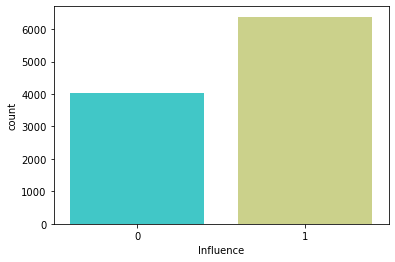

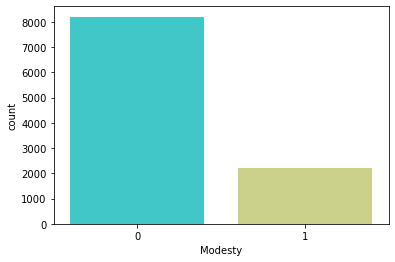

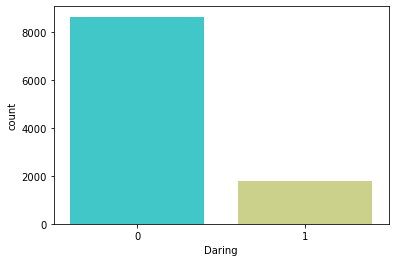

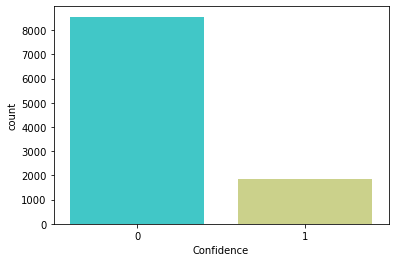

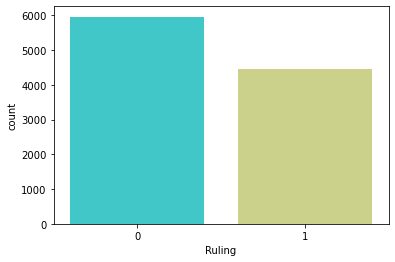

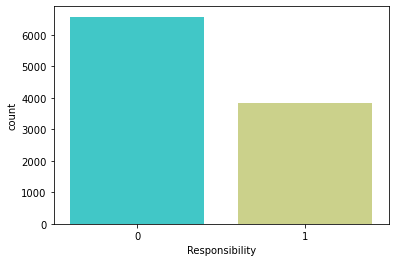

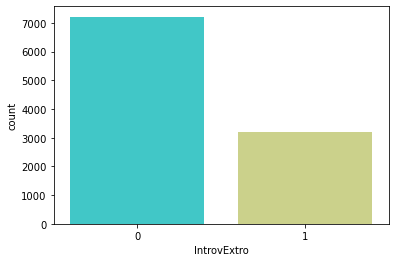

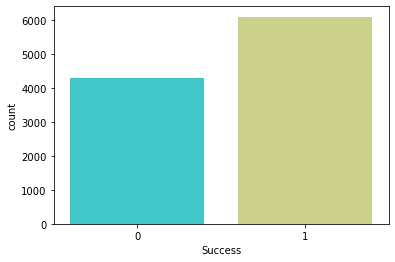

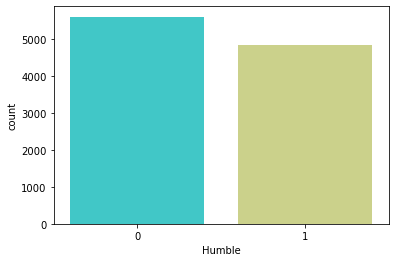

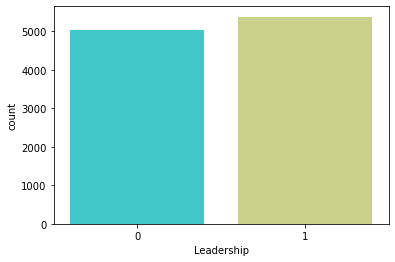

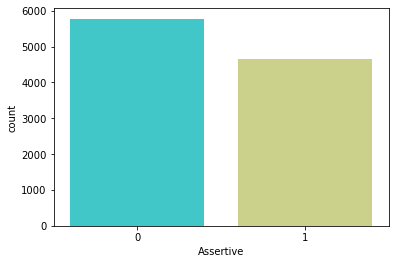

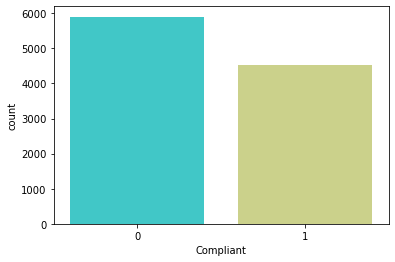

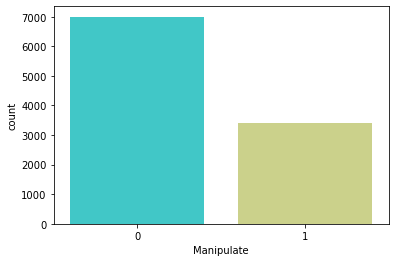

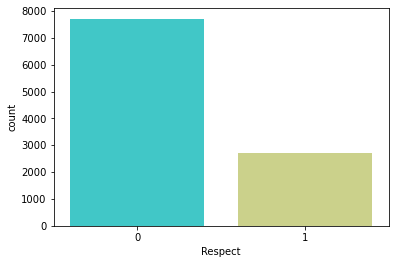

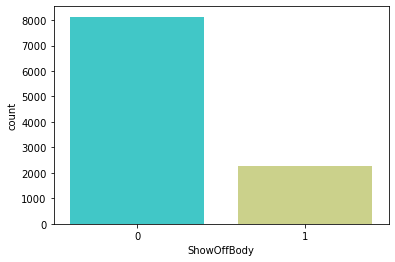

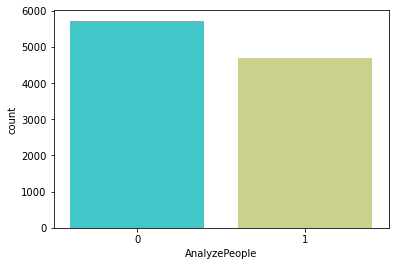

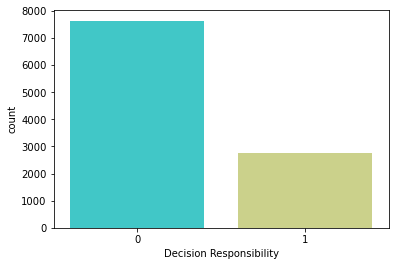

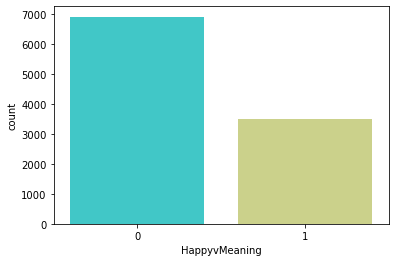

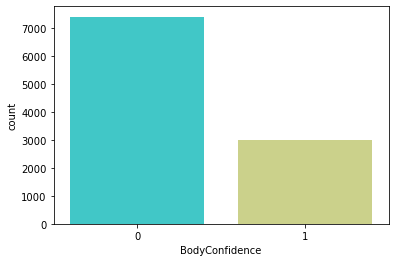

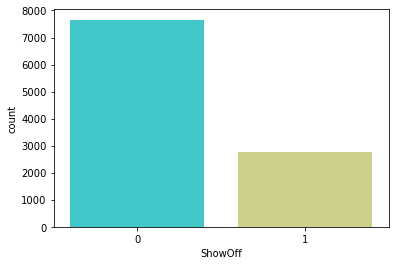

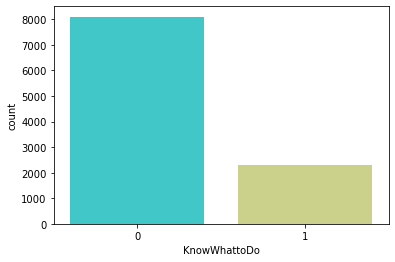

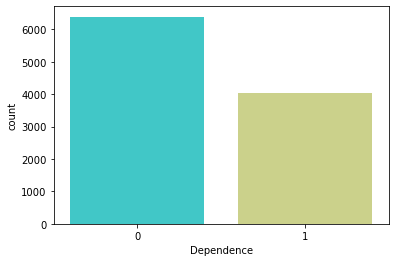

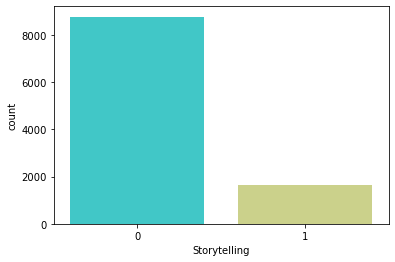

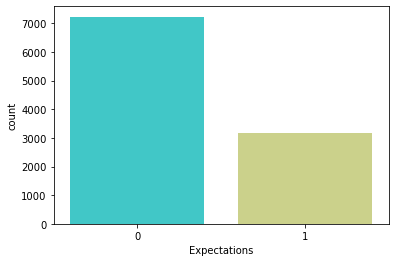

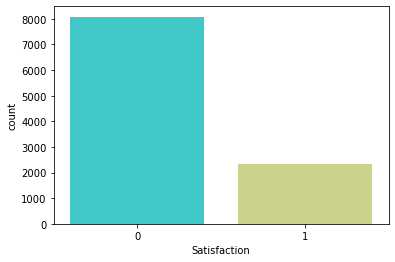

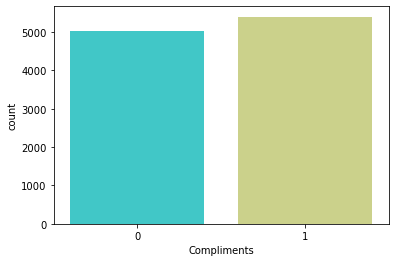

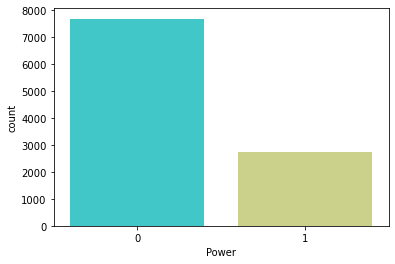

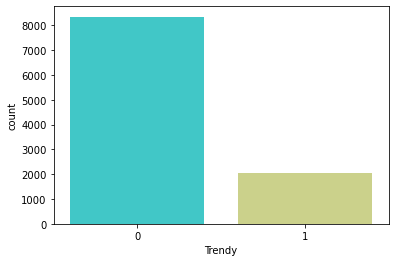

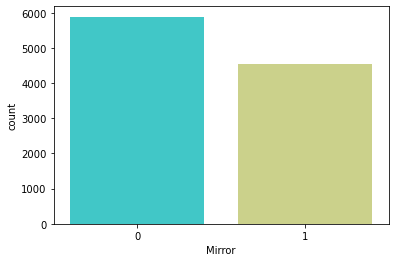

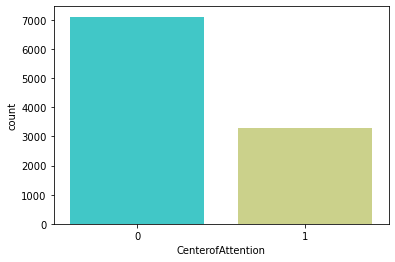

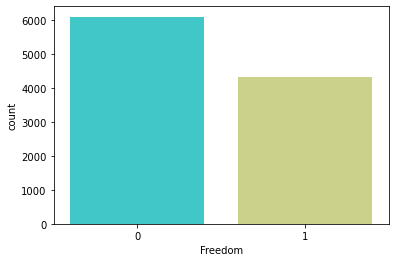

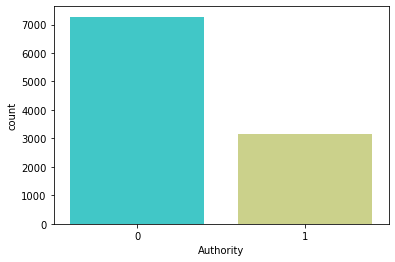

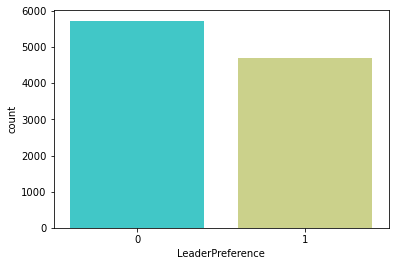

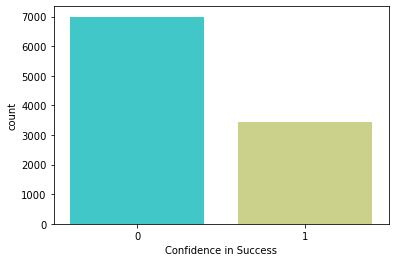

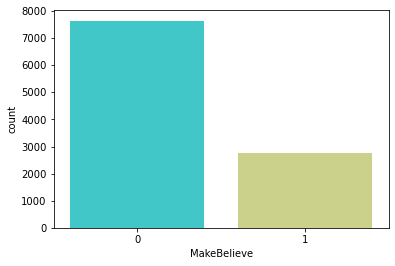

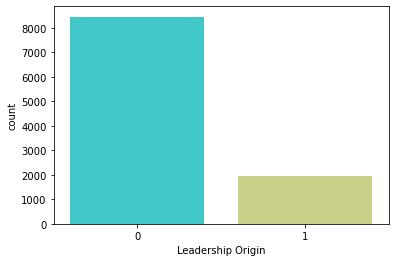

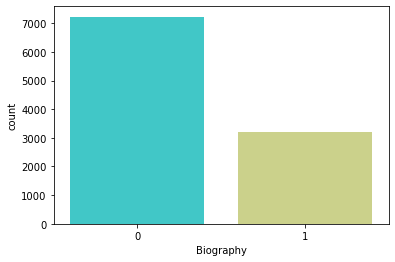

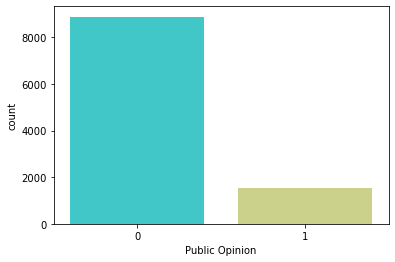

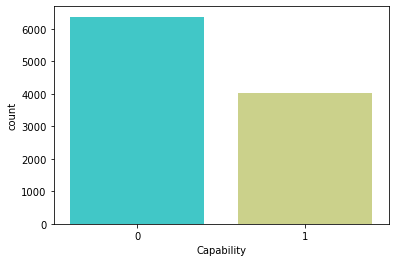

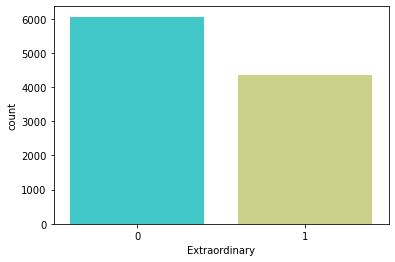

<IPython.core.display.Javascript object>

In [20]:
#Check distribution of binary variables 
for i in range(len(questions)):
    plt.figure()
    sns.countplot(x = questions[i], data=df, palette="rainbow")
    # Show/save figure as desired.
    plt.show()


In [21]:
px.histogram(
    df,
    x="score",
    color="gender",
    marginal="box",
    category_orders={"gender": ["Male", "Female", "Other"]},
)

<IPython.core.display.Javascript object>

In [22]:
px.scatter(df, x="score", y="age")

<IPython.core.display.Javascript object>

We can see here that there are some ages that make absolutely no sense, so lets remove them. We will also remove any ages that are less than 14 as that is what the codebook text stated to omit. 

In [23]:
# Cleaning inappropriate age as well as unknown gender
df = df[(df.age <= 117) & (df.age >= 14) & (df.gender != 0)]

# Lets do a box plot to get a better idea how these distributions compare
px.box(
    df,
    x="score",
    y="age",
    notched=True,
    color_discrete_sequence=px.colors.qualitative.Bold,
    title="Score Against Age",
)

<IPython.core.display.Javascript object>

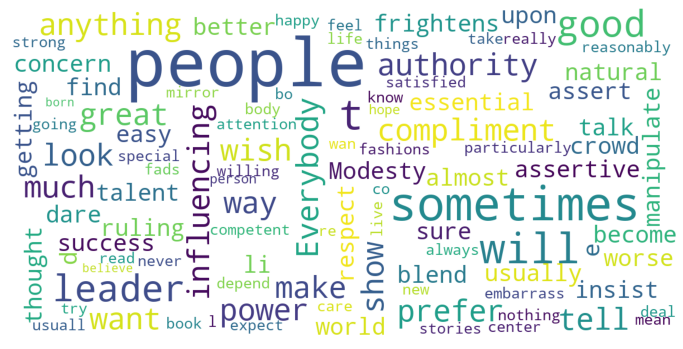

<IPython.core.display.Javascript object>

In [24]:
stopwords = set(STOPWORDS)
# mask = np.array(Image.open("Data/person.png"))


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="white",
        stopwords=stopwords,
        # mask = mask,
        max_words=100,
        max_font_size=40,
        scale=3,
        random_state=1,  # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(pd.read_csv("Data/codebookCleaned.txt"))

### Contingency Table

In [25]:
table = pd.crosstab(df["score"], df["gender"], margins=True, margins_name="Total")
table.columns = ["Male", "Female", "Other", "Total"]
display(table)
# df.describe()

,Male,Female,Other,Total
score,,,,
0,41,29,0,70
1,114,110,1,225
2,135,137,0,272
3,174,188,0,362
4,212,235,2,449
5,262,232,1,495
6,283,278,0,561
7,276,234,1,511
8,290,275,2,567


<IPython.core.display.Javascript object>

## Checking the Correlation For Our Variables

In [26]:
heatmap = px.imshow(df.corr())  # , text_auto=True)
heatmap.show()

<IPython.core.display.Javascript object>

### Writing Cleaned Dataset to New CSV

In [27]:
df.to_csv("Data/data_clean.csv")

<IPython.core.display.Javascript object>